In [20]:
import os
import sys
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import networkx as nx
import glob
import pandas as pd
import scipy 
import torch
# from torch_geometric.data import InMemoryDataset, download_url

In [21]:
# Load in label by name
def get_label(file, labels):
    pair_1 = file.split('/')[-1]
    pair_1, pair_2 = pair_1.split("and")
    pair_1 = pair_1.replace(".gpickle", "")
    pair_2 = pair_2.replace(".gpickle", "")
    l = int(labels.loc[(labels.protein_1 == pair_1)& (labels.protein_2 == pair_2)].label)
    return file, l

In [22]:
# Import the data
graph_dir_path = '/mnt/mnemo5/sum02dean/sl_projects/GCN/GCN-STRING/src/scripts/graph_data'
labels_dir_path = '/mnt/mnemo5/sum02dean/sl_projects/GCN/GCN-STRING/src/scripts/graph_labels'

graph_files = glob.glob(os.path.join(graph_dir_path, '*'))
graph_labels = glob.glob(os.path.join(labels_dir_path, '*'))
graph_labels = pd.read_csv(graph_labels[0])

# Create positive and negative sets
positives = []
pos_labels = []

negatives = []
neg_labels = []

for i, file in enumerate(graph_files):
    obs, label = get_label(file, graph_labels)
    
    if label == 1:
        positives.append(obs)
        pos_labels.append([1,0])
    else:
        negatives.append(obs)
        neg_labels.append([0,1])


In [23]:
G = nx.read_gpickle(positives[0])
A = nx.adjacency_matrix(G).todense()

<ipython-input-23-0b694c9f2b68>:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


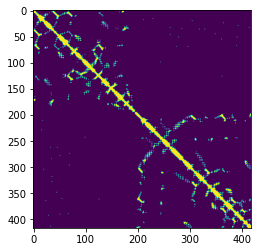

In [24]:
plt.imshow(A)
plt.show()